In [2]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
pd.set_option("max_columns", 30)

# READING 3 DIFFERENENT DATASETS
trends = pd.read_csv("../Data/trends.csv")

ETH = pd.read_csv("../Data/ETH_price.csv")
ETH = ETH[["date", "close"]]

data = pd.read_csv("../Data/train_complete.csv")
# data = data.iloc[:100000, :]
data['time'] = data['time'].apply(lambda x: x[:10])

c = list(data.columns)
c[0] = "date"
data.columns = c

# MERGING AND CHANING COLUMNS
data = pd.merge(data, trends, on='date')
data = pd.merge(data, ETH, on='date')

data['date'] = pd.to_timedelta(pd.to_datetime(data['date']), unit = 'seconds').astype('timedelta64[D]')

data['prestige_time_limit'] = data['prestige_time_limit'].apply(lambda x: np.nan if pd.isnull(x) else x[:10])
data['prestige_time_limit'] = pd.to_timedelta(pd.to_datetime(data['prestige_time_limit']), unit = 'seconds').astype('timedelta64[D]')

data = data.fillna('0')

fancy_scarcity = dict(data['fancy_type'].value_counts())
data['fancy_type_scarcity'] = data['fancy_type'].map(lambda x: fancy_scarcity[x])
np.save("Saved_scarcity_values/fancy_type_scarcity.npy", fancy_scarcity)

color_scarcity = dict(data['color'].value_counts())
data['color_scarcity'] = data['color'].map(lambda x: color_scarcity[x])
np.save("Saved_scarcity_values/color_scarcity.npy", color_scarcity)

generation_scarcity = dict(data['generation'].value_counts())
data['generation_scarcity'] = data['generation'].map(lambda x: generation_scarcity[x])
np.save("Saved_scarcity_values/generation_scarcity.npy", generation_scarcity)

data.head(5)

c:\users\dylan\anaconda3\envs\kitties\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Passing datetime64-dtype data to TimedeltaIndex is deprecated, will raise a TypeError in a future version
c:\users\dylan\anaconda3\envs\kitties\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Passing datetime64-dtype data to TimedeltaIndex is deprecated, will raise a TypeError in a future version


,date,ID,USD,generation,color,is_fancy,is_exclusive,fancy_type,is_prestige,prestige_type,prestige_ranking,fancy_ranking,prestige_time_limit,enhanced_cattributes_eyes,enhanced_cattributes_pattern,...,enhanced_cattributes_colorsecondary,enhanced_cattributes_colortertiary,enhanced_cattributes_coloreyes,status_cooldown_index,status_is_ready,status_is_gestating,purrs_count,purrs_is_purred,watchlist_count,watchlist_is_watchlisted,cryptokitties,close,fancy_type_scarcity,color_scarcity,generation_scarcity
0,18083.0,882455,23.51,3.0,cyan,False,False,0,False,0,0,0,0,tongue,wiley,...,cinderella,swampgreen,icy,1.0,True,False,1.0,False,0.0,False,2.565991,287.55,96689,13105,9010
1,18083.0,329115,8.70,2.0,topaz,False,False,0,False,0,0,0,0,topaz,googly,...,cottoncandy,lemonade,kittencream,4.0,True,False,1.0,False,0.0,False,2.565991,287.55,96689,4177,7187
2,18083.0,1606022,1.44,10.0,coralsunrise,True,False,Curdlin,False,0,0,3181,0,0,0,...,0,0,0,8.0,True,False,0.0,False,0.0,False,2.565991,287.55,1325,5926,4987
3,18083.0,769934,173.35,0.0,coralsunrise,False,False,0,False,0,0,0,0,ragdoll,amur,...,royalpurple,azaleablush,wuvme,5.0,True,False,11.0,False,0.0,False,2.565991,287.55,96689,5926,3850
4,18083.0,1154069,1.22,1.0,sizzurp,False,False,0,False,0,0,0,0,thicccbrowz,spock,...,swampgreen,kalahari,sizzurp,1.0,True,False,0.0,False,0.0,False,2.565991,287.55,96689,4702,14698


In [3]:
data.shape

(108621, 33)

## OneHotEncode:


data[['color', 'fancy_type', 'prestige_type', 'enhanced_cattributes_eyes', 'enhanced_cattributes_pattern', 'enhanced_cattributes_body', 'enhanced_cattributes_mouth', 'enhanced_cattributes_colorprimary', 'enhanced_cattributes_colorsecondary', 'enhanced_cattributes_colortertiary', 'enhanced_cattributes_coloreyes']].info()

In [4]:
from collections import defaultdict
d = defaultdict(LabelEncoder)
# d = LabelEncoder()

In [5]:
fit = data[['color', 'fancy_type', 'prestige_type', 'enhanced_cattributes_eyes', 'enhanced_cattributes_pattern', 'enhanced_cattributes_body', 'enhanced_cattributes_mouth', 'enhanced_cattributes_colorprimary', 'enhanced_cattributes_colorsecondary', 'enhanced_cattributes_colortertiary', 'enhanced_cattributes_coloreyes']].apply(lambda x: d[x.name].fit_transform(x))

data[['color', 'fancy_type', 'prestige_type', 'enhanced_cattributes_eyes', 'enhanced_cattributes_pattern', 'enhanced_cattributes_body', 'enhanced_cattributes_mouth', 'enhanced_cattributes_colorprimary', 'enhanced_cattributes_colorsecondary', 'enhanced_cattributes_colortertiary', 'enhanced_cattributes_coloreyes']] = fit

In [6]:
data.head(10)

,date,ID,USD,generation,color,is_fancy,is_exclusive,fancy_type,is_prestige,prestige_type,prestige_ranking,fancy_ranking,prestige_time_limit,enhanced_cattributes_eyes,enhanced_cattributes_pattern,...,enhanced_cattributes_colorsecondary,enhanced_cattributes_colortertiary,enhanced_cattributes_coloreyes,status_cooldown_index,status_is_ready,status_is_gestating,purrs_count,purrs_is_purred,watchlist_count,watchlist_is_watchlisted,cryptokitties,close,fancy_type_scarcity,color_scarcity,generation_scarcity
0,18083.0,882455,23.51,3.0,6,False,False,0,False,0,0,0,0,134,182,...,31,130,63,1.0,True,False,1.0,False,0.0,False,2.565991,287.55,96689,13105,9010
1,18083.0,329115,8.70,2.0,27,False,False,0,False,0,0,0,0,135,64,...,36,78,69,4.0,True,False,1.0,False,0.0,False,2.565991,287.55,96689,4177,7187
2,18083.0,1606022,1.44,10.0,5,True,False,12,False,0,0,3181,0,0,0,...,0,0,0,8.0,True,False,0.0,False,0.0,False,2.565991,287.55,1325,5926,4987
3,18083.0,769934,173.35,0.0,5,False,False,0,False,0,0,0,0,100,4,...,139,6,145,5.0,True,False,11.0,False,0.0,False,2.565991,287.55,96689,5926,3850
4,18083.0,1154069,1.22,1.0,24,False,False,0,False,0,0,0,0,130,155,...,160,71,122,1.0,True,False,0.0,False,0.0,False,2.565991,287.55,96689,4702,14698
5,18083.0,1640241,2.88,10.0,24,False,False,0,False,0,0,0,0,11,103,...,150,114,53,8.0,False,False,1.0,False,0.0,False,2.565991,287.55,96689,4702,4987
6,18083.0,1037945,14.12,31.0,8,False,False,0,False,0,0,0,0,124,168,...,129,106,38,13.0,True,False,4.0,False,0.0,False,2.565991,287.55,96689,7189,749
7,18083.0,981309,2.73,13.0,26,False,False,0,False,0,0,0,0,85,70,...,55,118,133,6.0,True,False,0.0,False,0.0,False,2.565991,287.55,96689,10330,3141
8,18083.0,1566587,0.52,3.0,16,False,False,0,False,0,0,0,0,50,147,...,97,67,83,3.0,True,False,0.0,False,0.0,False,2.565991,287.55,96689,6225,9010
9,18083.0,706235,0.52,2.0,5,False,False,0,False,0,0,0,0,58,32,...,111,79,100,3.0,True,False,0.0,False,0.0,False,2.565991,287.55,96689,5926,7187


In [8]:
for c in d:
    print(c)
    np.save(f'Saved_encoder/{c}.npy', d[c].classes_)


color
fancy_type
prestige_type
enhanced_cattributes_eyes
enhanced_cattributes_pattern
enhanced_cattributes_body
enhanced_cattributes_mouth
enhanced_cattributes_colorprimary
enhanced_cattributes_colorsecondary
enhanced_cattributes_colortertiary
enhanced_cattributes_coloreyes


In [9]:
y = data["USD"]
X = data.drop("USD", axis = 1)

In [10]:
length = 100000 # number of last transactions to consider
n = 500 # the lastest values to predict on

y = y[:length]
X = X.iloc[:length, :]

X_test = X.iloc[:n, :]
y_test = y[:n]

X_train = X.iloc[n:, :]
y_train = y[n:]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, median_absolute_error

regr = RandomForestRegressor(n_estimators=100, verbose= 3,n_jobs=8)
# regr = KNeighborsRegressor(n_neighbors=5)
# regr = ElasticNet(max_iter=3000)
# regr = SVR()
regr.fit(X_train, y_train)

pred = regr.predict(X_train)
print('model errors')
print('MSE (mean sqaured error) : ' + str(mean_squared_error(y_train, pred)))
print('MAE (mean absolute error): ' + str(mean_absolute_error(y_train, pred)))
print('MSE (median absolute error): ' + str(median_absolute_error(y_train, pred)))

pred = regr.predict(X_test)
print('future prediction errors (n next sales)')
print('MSE (mean sqaured error) : ' + str(mean_squared_error(y_test, pred)))
print('MAE (mean absolute error): ' + str(mean_absolute_error(y_test, pred)))
print('MSE (median absolute error): ' + str(median_absolute_error(y_test, pred)))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150


[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    6.7s


building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150building tree 60 of 150

building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66

[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:   42.7s


building tree 121 of 150
building tree 122 of 150
building tree 123 of 150
building tree 124 of 150
building tree 125 of 150
building tree 126 of 150
building tree 127 of 150
building tree 128 of 150
building tree 129 of 150
building tree 130 of 150
building tree 131 of 150
building tree 132 of 150
building tree 133 of 150
building tree 134 of 150
building tree 135 of 150
building tree 136 of 150
building tree 137 of 150
building tree 138 of 150
building tree 139 of 150
building tree 140 of 150
building tree 141 of 150
building tree 142 of 150
building tree 143 of 150
building tree 144 of 150
building tree 145 of 150
building tree 146 of 150
building tree 147 of 150
building tree 148 of 150
building tree 149 of 150
building tree 150 of 150


[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:   59.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    1.0s


model errors
MSE (mean sqaured error) : 143.0829721878827
MAE (mean absolute error): 1.3094643806582678
MSE (median absolute error): 0.24877222222222095
future prediction errors (n next sales)
MSE (mean sqaured error) : 203.23087717509264
MAE (mean absolute error): 5.221701076200893
MSE (median absolute error): 1.4576533333333346


[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    1.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished


## NEED TO DO SOME ANALYSIS ON THIS !

## IMPOSSIBLY GOOD!
model errors
MSE (mean sqaured error) : 151.92749016087745
MAE (mean absolute error): 1.3045726339092254
MSE (median absolute error): 0.24500000000000005
future prediction errors (n next sales)
MSE (mean sqaured error) : 172.5183101306291
MAE (mean absolute error): 4.9146237070468395
MSE (median absolute error): 1.4252999999999993

### 500
model errors
MSE (mean sqaured error) : 161.20318497980782
MAE (mean absolute error): 1.299170089275729
MSE (median absolute error): 0.24479999999999902
future prediction errors (n next sales)
MSE (mean sqaured error) : 1626.4941032838533
MAE (mean absolute error): 7.506933440378601
MSE (median absolute error): 0.9996502380952382

In [19]:
p = []
a = []
for i in range(300,400):
#     print(regr.predict(X_test.iloc[-i,:].values.reshape(1,-1)),y_test.iloc[-i])
    p.append(round(list(regr.predict(X_test.iloc[-i,:].values.reshape(1,-1)))[0],3))
    a.append(y_test.iloc[-i])

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_job

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_job

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_job

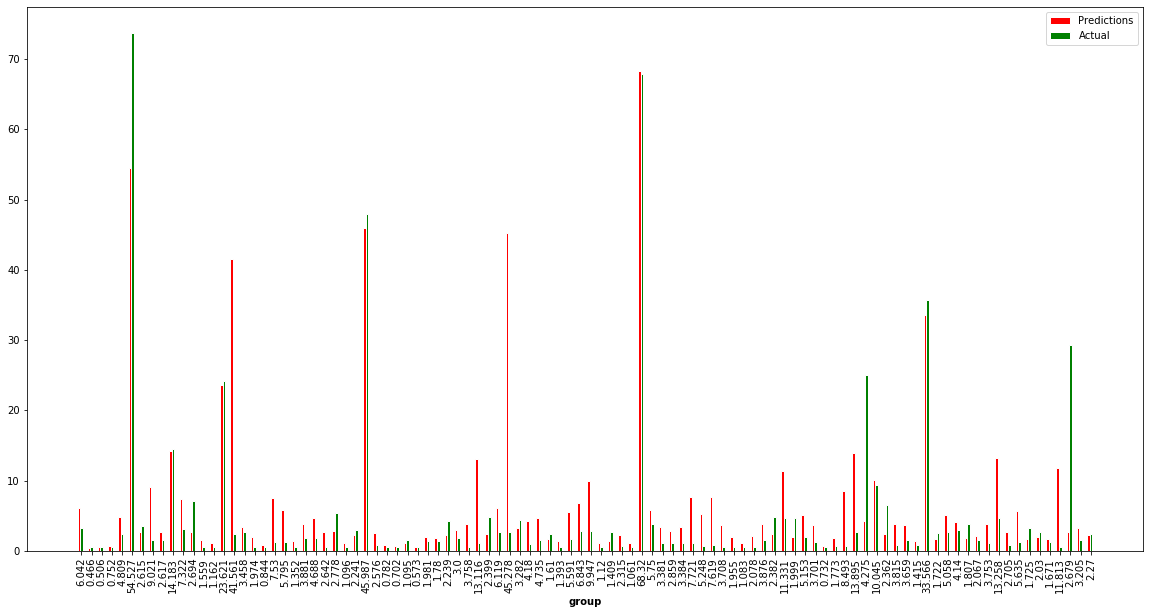

In [20]:
# set width of bar
import matplotlib.pyplot as plt
%matplotlib inline
barWidth = 0.25

f = plt.figure(figsize=(20,10))
bars1 = p
bars2 = a
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Predictions')
plt.bar(r2, bars2, color='green', width=barWidth, edgecolor='white', label='Actual')
# plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], p, rotation='vertical')
 
# Create legend & Show graphic
plt.legend()
plt.show()


In [14]:
res = dict()
for i in range(len(X.columns)):
    res.update({X.columns[i]: regr.feature_importances_[i]})
    print(i, end = "\r")
    


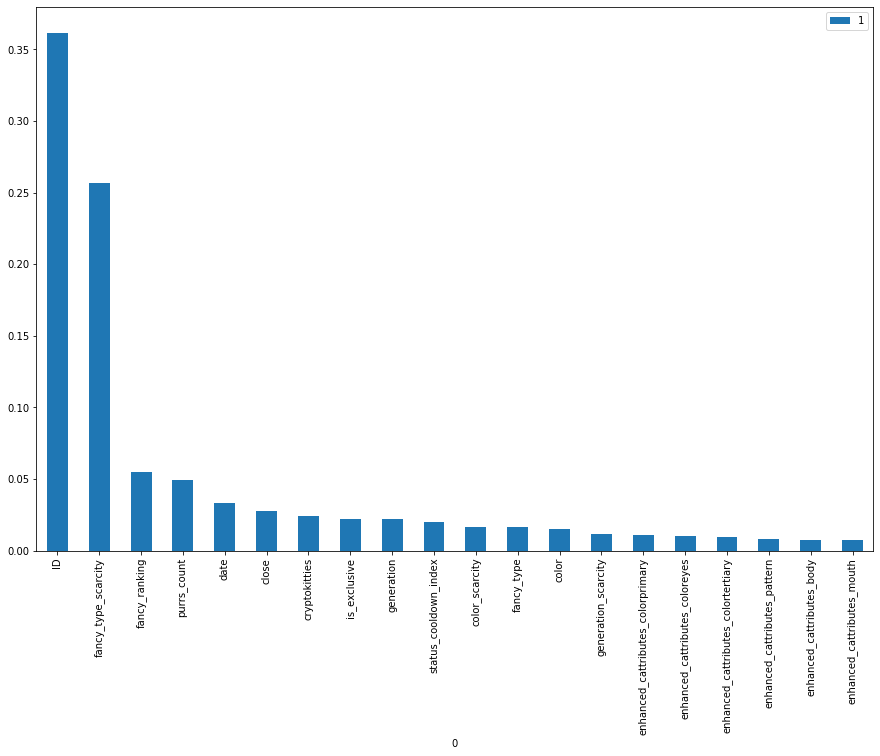

In [15]:
import warnings
warnings.filterwarnings("ignore")
pd.DataFrame(res.items()).sort_values(by = 1, ascending=False)[:20].plot.bar(x = 0,figsize=(15,10))

In [16]:
import pickle
import datetime
filename = "Saved_models/ML_Model_" + datetime.datetime.now().isoformat().replace(':', "-")[:-7] + ".sav"
pickle.dump(regr, open(filename, 'wb'))